In [1]:
import recruit_utils
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
# Import data into pandas data frames
data, stores = recruit_utils.import_data()

recruit_utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['tra']['visitor_diff'][mask] = np.nan
recruit_utils.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['tra']['log_visitor_diff'][mask] = np.nan


In [4]:
train, test = recruit_utils.create_train_test(data, stores, clean=True, predict_large_party=True)

Optimization terminated successfully.
         Current function value: 0.004090
         Iterations 12


In [6]:
# Define list of main predictor variables for visualizations
categorical_predictors = ['day', 'month', 'air_area_name4', 'air_area_name',
                    'air_area_name2', 'wom', 'date_int', 'dow',
                    'air_genre_name1', 'air_genre_name0', 'air_genre_name',  
                    'holiday_flg', 'year', 'air_area_name0']
                    

numeric_predictors = ['median_visitors', 'max_visitors', 'min_visitors', 'rv1_x',
                'count_observations', 'rv2_x', 'longitude', 'rs2_x', 'rs1_x']

target_columns = ['visitors', 'log_visitors']

id_columns = ['air_store_id', 'id', 'air_store_id2']

In [6]:
subset = numeric_predictors + categorical_predictors

y = train[target_columns[1]]
X = train[subset]

lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           log_visitors   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Sun, 04 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:03:35   Log-Likelihood:            -2.4426e+05
No. Observations:              250468   AIC:                         4.886e+05
Df Residuals:                  250447   BIC:                         4.888e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
median_visitors        0.0468      0

In [7]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\pandas\core\series.py:1410: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


,VIF Factor,features
0,2.900000,median_visitors
1,1.400000,max_visitors
2,2.300000,min_visitors
3,3.300000,rv1_x
4,1.100000,count_observations
5,3.000000,rv2_x
6,7.100000,longitude
7,2.000000,rs2_x
8,1.900000,rs1_x
9,inf,day


In [8]:
# Define list of main predictor variables for visualizations
categorical_predictors = ['day', 'month', 'air_area_name', 'day_of_week', 
                    'air_genre_name', 'holiday_flg']                    

numeric_predictors = ['median_visitors', 'max_visitors', 'min_visitors', 'rv2_x', 'rs2_x']

subset = numeric_predictors + categorical_predictors

In [9]:
y = train[target_columns[1]]
X = train[subset]

lm2 = sm.OLS(y, X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           log_visitors   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.097e+05
Date:                Sun, 04 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:03:44   Log-Likelihood:            -2.8222e+05
No. Observations:              250468   AIC:                         5.645e+05
Df Residuals:                  250457   BIC:                         5.646e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
median_visitors     0.0588      0.000    3

In [10]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,9.4,median_visitors
1,3.9,max_visitors
2,3.8,min_visitors
3,1.8,rv2_x
4,1.8,rs2_x
5,3.5,day
6,3.3,month
7,3.1,air_area_name
8,2.8,day_of_week
9,3.4,air_genre_name


In [11]:
lm = linear_model.LinearRegression()
y = train[target_columns[1]].as_matrix()
X = train[subset].as_matrix()

cv_results = recruit_utils.time_series_cv(y, X, lm)
print(np.mean(cv_results))

0.643821711963


In [12]:
lm_fit = lm.fit(X, y)
X_test = test[subset].as_matrix()
lm_predictions = lm_fit.predict(X_test)
recruit_utils.score_predictions(lm_predictions, 'scored_lm')

In [13]:
subset = train.columns.values.tolist()
subset = [col for col in subset if col not in target_columns + id_columns]
subset.remove('visit_date')

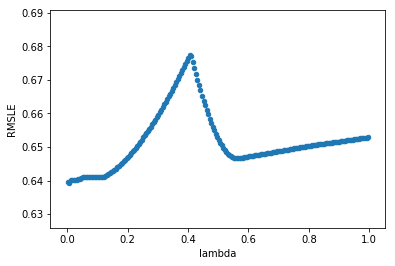

In [15]:
y = train[target_columns[1]].as_matrix()
X = train[subset].as_matrix()
cv_results_df = pd.DataFrame(columns=['lambda', 'RMSLE'])

for alpha in np.arange(0.001, 1.000, 0.005):
    clf = linear_model.Lasso(alpha=alpha)

    cv_results = recruit_utils.time_series_cv(y, X, clf)
    temp_df = pd.DataFrame([[alpha, np.mean(cv_results)]], columns=['lambda', 'RMSLE'])
    cv_results_df = cv_results_df.append(temp_df, ignore_index=True)
    
cv_results_df.plot.scatter(x='lambda', y='RMSLE')
lasso_cv_results_df = cv_results_df

In [7]:
subset = train.columns.values.tolist()
subset = [col for col in subset if col not in target_columns + id_columns]
subset.remove('visit_date')

In [8]:
y = train[target_columns[1]].as_matrix()
X = train[subset].as_matrix()

rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
rfr_cv_results = recruit_utils.time_series_cv(y, X, rfr)

In [9]:
print(np.mean(rfr_cv_results))

0.142023931317


In [10]:
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
lgbm_cv_results = recruit_utils.time_series_cv(y, X, lgbm)

In [11]:
print(np.mean(lgbm_cv_results))

0.154015204646


In [12]:
lgbm_fit = lgbm.fit(X, y)
X_test = test[subset].as_matrix()
lgbm_predictions = lgbm_fit.predict(X_test)
recruit_utils.score_predictions(lgbm_predictions, 'scored_lgbm')

In [13]:
p = np.expm1(lgbm_fit.predict(train[subset]))

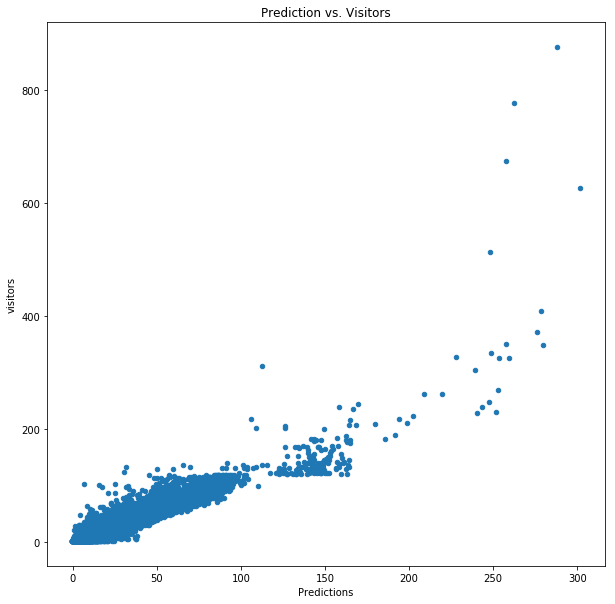

In [14]:
train['Predictions'] = p
train.plot.scatter(x='Predictions', y='visitors', figsize=(10, 10), title='Prediction vs. Visitors')